<a href="https://colab.research.google.com/github/msalvador45/mlProject/blob/main/KNN_ESRB_RATING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Author: Miguel Salvador*
*Date: 5/7/22*

#Predicting Video Game Ratings
This project is about predicting the outcome of video game's rating. The game rating is responsible of informing the public what age demographic should play a particular game. This model is a tool that could potentionally help in the development cycle of a game. By being able to input various categories of a game, this model will predict it's rating. With this development could be pivoted before furthering future development.

#Inspired work
This project idea was made possible by the website Kaggle, where the dataset was found. Most of this work are alterations from past assignments such as the data analysis, data processing, and constructing the KNN model. There was an article by Amey Band, that I took great inspiration in finding the best K for a KNN model as well. The use of a for loop to find the best K value.

#Algorithms Used
For this project I had to pick out a model that can predict for a classifying problem and could take in different assortments of information, a quick and easy model to work on as well and KNN was a great fit. This dataset contains various features, which KNN is able to learn from as well. A not complicated model also helped as in the dataset is not huge and did not need a complex model such as a Neural Network as it is not needed to have that complexity with this dataset.

#Additional Analysis
Part of machine learning is preprocessing data. In this dataset most features are actually binary 1 for true 0 false. Although this at first sounds like an easy dataset to work with, it can actually make the model a lot more difficult to work with. In order to solve this issue the data can get scale the data or normalizing the data. Scaling in this case will give the binary data a range from 0 to 1.


#Libraries Used
Found below are all the libraries I used in the program, to be apble to open a dataset, create arrays, and create the model itself.

In [ ]:
!unzip data.zip

unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


In [ ]:
"""load in libraries that will be used"""
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Dataset
The dataset that will be used comes from the Kaggle website. The dataset contains 1895 different samples w/ 34 features. The output is the ESRB ratings (RP , EC , E , ET , T , M , A). Dataset has two files one for trainig the other for testing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""load in the dataset"""
train_df= pd.read_csv("/content/drive/MyDrive/machineLearning/final/content/Video_games_esrb_rating.csv") 
test_df= pd.read_csv("/content/drive/MyDrive/machineLearning/final/content/test_esrb.csv")
"""Get rid of any possible NaN rows"""
train_df.dropna()
test_df.dropna()


,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,For Honor,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
496,Victor Vran Overkill Edition,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
497,Danganronpa 1•2 Reload,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,M
498,Touhou Double Focus,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T


# Data Analysis
Using pandas there will be an analysis of the dataframe. Starting with initial shape and info.

In [ ]:
print("shape of the training dataset\n",train_df.shape)
print("shape of the testing dataset\n")
train_df

shape of the training dataset
 (1895, 34)
shape of the testing dataset



,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


In [ ]:
print("Shape of the testing dataset\n", test_df.shape)
test_df

Shape of the testing dataset
 (500, 34)


,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,For Honor,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
496,Victor Vran Overkill Edition,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
497,Danganronpa 1•2 Reload,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,M
498,Touhou Double Focus,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T


We can see all the columns and the type of data they hold.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

We can see a data analysis of the columns

In [ ]:
train_df.describe()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,...,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000
mean,0.475462,0.050132,0.010026,0.227968,0.126121,0.019525,0.054354,0.034828,0.220580,0.118206,...,0.013193,0.034301,0.057520,0.067018,0.118206,0.035884,0.117678,0.015831,0.015831,0.063852
std,0.499529,0.218275,0.099655,0.419633,0.332074,0.138398,0.226774,0.183394,0.414748,0.322937,...,0.114129,0.182049,0.232895,0.250120,0.322937,0.186050,0.322312,0.124855,0.124855,0.244554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

#Prepare Dataset
prepare dataset for training model. We will need an X and y array to store values. One column, (console), will be removed as the feature is not one that corresponds to rating. We want to scale the data so we our training can an easier time to create the model.

In [ ]:
"""Get rid of the target and title column, save in X"""
X_train_df= train_df.drop(columns= ['title', 'esrb_rating', 'console'])
print(X_train_df.info())
"""Only get esrb rating for output Y"""
y_train_df= train_df['esrb_rating']
print(y_train_df.shape)
"""scale the data"""
sc= StandardScaler()
sc.fit(X_train_df)
X_train_df= sc.transform(X_train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   alcohol_reference         1895 non-null   int64
 1   animated_blood            1895 non-null   int64
 2   blood                     1895 non-null   int64
 3   blood_and_gore            1895 non-null   int64
 4   cartoon_violence          1895 non-null   int64
 5   crude_humor               1895 non-null   int64
 6   drug_reference            1895 non-null   int64
 7   fantasy_violence          1895 non-null   int64
 8   intense_violence          1895 non-null   int64
 9   language                  1895 non-null   int64
 10  lyrics                    1895 non-null   int64
 11  mature_humor              1895 non-null   int64
 12  mild_blood                1895 non-null   int64
 13  mild_cartoon_violence     1895 non-null   int64
 14  mild_fantasy_violence     1895 non-null 

In [ ]:
"""Do the same for the testing dataset"""
X_test_df= test_df.drop(columns= ['title', 'esrb_rating', 'console'])
print(X_test_df.info())
y_test_df= test_df['esrb_rating']
print(y_test_df.shape)
"""Scaler on X test"""
sc.fit(X_test_df)
X_test_df= sc.transform(X_test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   alcohol_reference         500 non-null    int64
 1   animated_blood            500 non-null    int64
 2   blood                     500 non-null    int64
 3   blood_and_gore            500 non-null    int64
 4   cartoon_violence          500 non-null    int64
 5   crude_humor               500 non-null    int64
 6   drug_reference            500 non-null    int64
 7   fantasy_violence          500 non-null    int64
 8   intense_violence          500 non-null    int64
 9   language                  500 non-null    int64
 10  lyrics                    500 non-null    int64
 11  mature_humor              500 non-null    int64
 12  mild_blood                500 non-null    int64
 13  mild_cartoon_violence     500 non-null    int64
 14  mild_fantasy_violence     500 non-null    

Create numpy arrays to hold values from the dataset

In [ ]:
"""Create arrays & check for correct dimensionality"""
X_train_arr= np.array(X_train_df)
y_train_arr= np.array(y_train_df)
"""encode string array"""
le= LabelEncoder() #class used to encode string label
y_train_labels= le.fit_transform(y_train_arr)

In [ ]:
"""Create the arrays and encoding for testing dataset"""
X_test_arr= np.array(X_test_df)
y_test_arr= np.array(y_test_df)
#encoding test labels
le= LabelEncoder()
y_test_labels= le.fit_transform(y_test_arr)

#Creating the KNN model

Start by creating a quick model w/ any k value. In thi case 4. Which gives us an accuracy score of 76.4%

In [ ]:
"""Make a KNN model"""
k=4 #K value at 4
neighModel= KNeighborsClassifier(n_neighbors=k).fit(X_train_arr, y_train_arr)
pred_y= neighModel.predict(X_test_arr)
#This will print out our accuracy for K= 4
print("Acc of model at K=4 is", metrics.accuracy_score(y_test_arr, pred_y))

Acc of model at K=4 is 0.762


To try to increase the accuracy of the model, the use of a for loop is needed. For every iteration the K value will increase as well.

In [ ]:
"""Optimize the KNN model"""
acc= [] #Store accuracy score
for i in range(1,40):
  knn= KNeighborsClassifier(n_neighbors=i) #amt of neighbors is tied to i
  knn.fit(X_train_arr, y_train_arr) #fitting data
  pred_i= knn.predict(X_test_arr) #predicting the values of the test datset
  acc.append(metrics.accuracy_score(y_test_arr, pred_i))   

Over 40 iterations, we are able to see the best K value would be 22.

Max accuracy:- 0.796 at k = 24


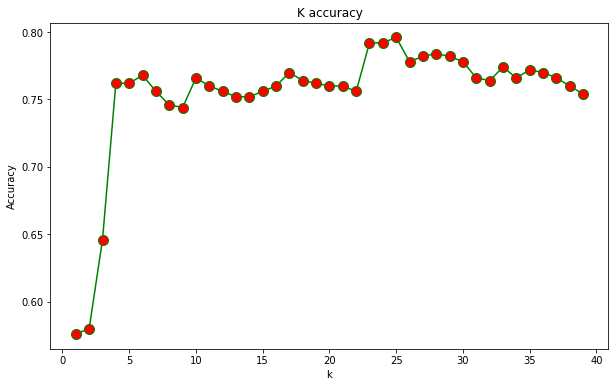

In [ ]:
"""plot a figure to show accuracy of diff. k values"""
plt.figure(figsize=(10,6))
plt.plot(range(1,40), acc, color= 'green',
         marker='o', markerfacecolor='red', markersize=10)
plt.title("K accuracy")
plt.xlabel('k')
plt.ylabel('Accuracy')
print("Max accuracy:-", max(acc),"at k =", acc.index(max(acc))) 

We can see the head and tail of the predicted values and real values

In [ ]:
"""Compare the predicted values with the actual values"""
compare= {'predicted':pred_i, 'actual':y_test_arr}
compare_df= pd.DataFrame(data=compare)
#compare_df=compare_df.transpose()
print(compare_df)

    predicted actual
0           T      T
1           E      E
2           M      T
3           E      E
4          ET     ET
..        ...    ...
495         M      M
496         T      M
497         M      M
498        ET      T
499         T      T

[500 rows x 2 columns]


#Resources
1. Band, Amey. “How to Find the Optimal Value of K in Knn?” Medium, Towards Data Science, 3 Mar. 2022, https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers. 
2. https://pandas.pydata.org/docs/index.html
3. https://www.analyticssteps.com/blogs/how-does-k-nearest-neighbor-works-machine-learning-classification-problem
4. Dataset: https://www.kaggle.com/datasets/imohtn/video-games-rating-by-esrb